# King Country, USA House Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm
import seaborn as sns

sns.set()
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.precision', 2)
%matplotlib notebook
plt.rcParams['figure.figsize'] = 10, 10

### Importing Dataset

In [2]:
df = pd.read_csv('kc_house_data1.csv')

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,-1991,47.51,-122.26
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,-4,0,47.72,-122.32
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,-22,-1991,47.74,-122.23
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,10,-1991,47.52,-122.39
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,32,-1991,47.62,-122.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [5]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [7]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
count,21613.00,21613.00,21613.00,2.16e+04,21613.00,2.16e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,3.37,2.11,2079.90,1.51e+04,1.49,7.54e-03,0.23,3.41,7.66,1788.39,291.51,16.01,-1906.60,47.56,-122.21
std,0.93,0.77,918.44,4.14e+04,0.54,8.65e-02,0.77,0.65,1.18,828.09,442.58,29.37,401.68,0.14,0.14
min,0.00,0.00,290.00,5.20e+02,1.00,0.00e+00,0.00,1.00,1.00,290.00,0.00,-55.00,-1991.00,47.16,-122.52
25%,3.00,1.75,1427.00,5.04e+03,1.00,0.00e+00,0.00,3.00,7.00,1190.00,0.00,-4.00,-1991.00,47.47,-122.33
50%,3.00,2.25,1910.00,7.62e+03,1.50,0.00e+00,0.00,3.00,7.00,1560.00,0.00,20.00,-1991.00,47.57,-122.23
75%,4.00,2.50,2550.00,1.07e+04,2.00,0.00e+00,0.00,4.00,8.00,2210.00,560.00,42.00,-1991.00,47.68,-122.12
max,33.00,8.00,13540.00,1.65e+06,3.50,1.00e+00,4.00,5.00,13.00,9410.00,4820.00,60.00,24.00,47.78,-121.31


### For Plotting Histigram

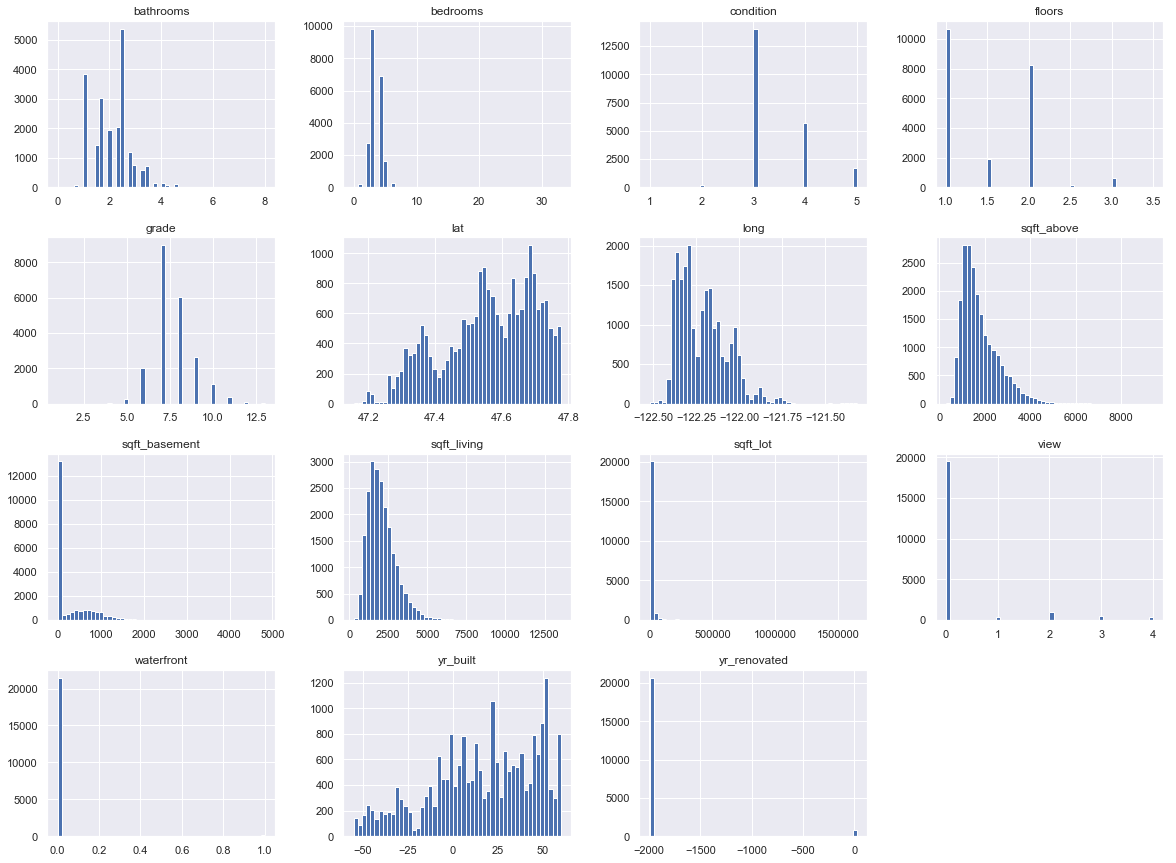

In [8]:
X.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [10]:
y.describe()

count    2.16e+04
mean     5.40e+05
std      3.67e+05
min      7.50e+04
25%      3.22e+05
50%      4.50e+05
75%      6.45e+05
max      7.70e+06
Name: price, dtype: float64

### For Missing Values

In [11]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
dtype: int64


##### There is no missing value in the dataset.

### Looking For Correlations

In [12]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
yr_built         0.05
condition        0.04
long             0.02
Name: price, dtype: float64

### Stepwise selection

#### Initial Iteration

In [37]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X = sm.add_constant(X)
mreg = sm.OLS(y, X).fit()
display(mreg.summary())


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     3502.
Date:                Sat, 23 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:33   Log-Likelihood:            -2.9481e+05
No. Observations:               21613   AIC:                         5.897e+05
Df Residuals:                   21598   BIC:                         5.898e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.006e+07    1.5e+06    -26.657      0.000    -4.3e+07   -3.71e+07
bedrooms      -3.385e+04   1906.033    -17.759      0.000   -3.76e+04   -3.01e+04
bathrooms      4.192e+04   3282.441     12.772      0.000    3.55e+04    4.84e+04
sqft_living     114.1817      2.150     53.107      0.000     109.967     118.396
sqft_lot         -0.0617      0.035     -1.762      0.078      -0.130       0.007
floors        -1982.5427   3585.539     -0.553      0.580   -9010.465    5045.379
waterfront     5.832e+05   1.75e+04     33.289      0.000    5.49e+05    6.18e+05
view           5.192e+04   2127.451     24.403      0.000    4.77e+04    5.61e+04
condition      3.034e+04   2358.297     12.866      0.000    2.57e+04     3.5e+04
grade          1.024e+05   2078.681     49.283      0.000    9.84e+04    1.07e+05
sqft_above       75.8210      2.158     35.127      0.000      71.590      80.052
sqft_basement    38.3609      2.670     14.369      0.000      33.128      43.594
yr_built      -2472.9041     72.752    -33.991      0.000   -2615.503   -2330.305
yr_renovated     19.8380      3.685      5.384      0.000      12.615      27.061
lat            5.648e+05   1.06e+04     53.444      0.000    5.44e+05    5.85e+05
long          -1.027e+05   1.17e+04     -8.784      0.000   -1.26e+05   -7.98e+04
==============================================================================
Omnibus:                    18197.968   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1726367.901
Skew:                           3.529   Prob(JB):                         0.00
Kurtosis:                      46.211   Cond. No.                     3.34e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Other Iterations

In [38]:
(F, pval) = f_regression(X, y)
F,pval


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


(array([           nan, 2.27047248e+03, 8.22879468e+03, 2.10029321e+04,
        1.75118043e+02, 1.52560205e+03, 1.64994390e+03, 4.05174203e+03,
        2.86589572e+01, 1.73633079e+04, 1.25139440e+04, 2.53187904e+03,
        6.31593119e+01, 3.51122447e+02, 2.24744477e+03, 1.00602586e+01]),
 array([            nan, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        8.06152545e-040, 1.63041663e-322, 0.00000000e+000, 0.00000000e+000,
        8.71940693e-008, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.99921450e-015, 9.97635576e-078, 0.00000000e+000, 1.51713739e-003]))

In [39]:
index = list()
for i in range(1,len(df.columns)+1):
    if max(F[1:len(df.columns)+1]) == F[i] and max(F[1:len(df.columns)+1]) > stats.f.ppf(q = 1-0.05, dfn = 2, dfd = len(df) - (2+1)):
        index.append(i)
        break
    
modeled_X = df.iloc[:,index]
modeled_X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [14]:
for j in range(len(df.columns)-2):
    #f test for adding column or model significance
    fvalue1 = []
    for i in range(len(df.columns)-1):
        if i+1 not in index:
            index1 = index + [i+1]
            X = df.iloc[:,index1]
            X = sm.add_constant(X)
            mreg = sm.OLS(y, X).fit()
            #display(mreg.summary())
            fvalue1.append(mreg.fvalue)
        else:
            fvalue1.append(0)
    
    for i in range(len(df.columns)-1):
        if max(fvalue1) == fvalue1[i] and max(fvalue1) > stats.f.ppf(q = 1-0.05, dfn = len(index)+1, dfd = len(df) - (len(index)+2)):
            index.append(i+1)
            break
        
    modeled_X = df.iloc[:,index]

    #partial f test for removing insignificanct columns
    cols=list(modeled_X.columns)
    X = modeled_X
    X = sm.add_constant(X)
    mreg = sm.OLS(y, X).fit()
    for i in range(len(index)):
        X = modeled_X.drop([cols[i]],axis = 1)
        X = sm.add_constant(X)
        mreg1 = sm.OLS(y, X).fit()
        res = anova_lm(mreg1,mreg)
        if res.F[1] == np.nan or res.F[1]>=stats.f.ppf(q = 0.95, dfn = len(df) - res.df_resid[1], dfd = res.df_resid[1]):
            continue
        elif res.F[1]<stats.f.ppf(q = 0.95, dfn = len(df) - res.df_resid[1], dfd = res.df_resid[1]):
            modeled_X = modeled_X.drop([cols[i]],axis = 1)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
modeled_X.head()

,sqft_living,lat,view,grade,yr_built,waterfront,bedrooms,bathrooms,condition,sqft_above,long,yr_renovated,sqft_lot
0,1180,47.51,0,7,0,0,3,1.00,3,1180,-122.26,-1991,5650
1,2570,47.72,0,7,-4,0,3,2.25,3,2170,-122.32,0,7242
2,770,47.74,0,6,-22,0,2,1.00,3,770,-122.23,-1991,10000
3,1960,47.52,0,7,10,0,4,3.00,5,1050,-122.39,-1991,5000
4,1680,47.62,0,8,32,0,3,2.00,3,1680,-122.05,-1991,8080


In [40]:
mreg = sm.OLS(y, modeled_X).fit()
mreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.125e+05
Date:                Sat, 23 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:21:23   Log-Likelihood:            -3.0033e+05
No. Observations:               21613   AIC:                         6.007e+05
Df Residuals:                   21612   BIC:                         6.007e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1569      0.784    335.464      0.000     261.619     264.694
==============================================================================
Omnibus:                    16033.415   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689715.036
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.958   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Splitting the dataset into Training set and Test set, Fitting the model and Prediction

In [27]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modeled_X, y, test_size = 0.2, random_state = 42)
#Fitting multiple linear regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Predicting y_test results using model y_test ~ X_test
regressor.predict(X_test)

array([ 456486.6867909 ,  770585.89921819, 1206524.01493281, ...,
        380303.38313419,  598542.66338376,  400157.366076  ])

In [34]:
y = df.iloc[:,0].values.reshape(-1,1)
X = df.iloc[:,3].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

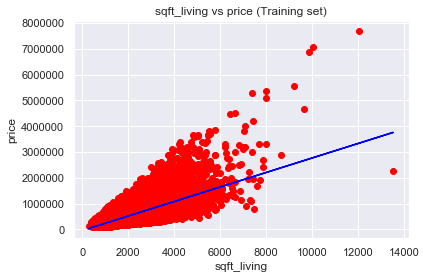

In [36]:
#Visualising the results
plt.scatter(X, y, color = 'red')
plt.plot(X, reg.predict(X), color = 'blue')
plt.title('sqft_living vs price (Training set)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()